# Exercise 2.4 - Nonstationary Greedy

The goal of this task is to create a nonstationary 10-armed bandit problem and to see how two different epsilon-greedy algorithms with epsilon = 0.1 perform, where the first algorithm has an adaptive step-size (1/n_a) and the second algorithm has a constant step-size. Adaptive step-size means that whenever I take action a, the n_a for this action increases and thus the update becomes smaller(because 1/n_a decreases) 

We have 10 arms, where each one's action values q*(a) was drawn i.i.d from a normal distribution with mean 0 and variance 1. When we then select an action A_t the reward is calculated from a normal distribution with mean q*(A_t) and variance 1. After each step(so after each time that we chose an action) we update the values of all arms. With a probability of 0.5 we increase them by 0.1 and with probability 0.5 we decrease them by 0.1(random walk). 

Note: As preliminary task to make sure that the code really works as requested, I will compare the epsilon-greedy algorithm with epsilon = 0.1 and 0 on a stationary task. 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

##  Epsilon-greedy comparison (stationary)

We start of by having a first little experiment where we want to compare the performance of the epsilon greedy algorithm with epsilon = 0.1 and epsilon = 0 on a stationary problem. Note that here we use adaptive stepsize.

### Epsilon = 0 

In [35]:
# initialize data structures
action_values = np.zeros(10)
initial_action_values = np.zeros(10)
action_values_count = np.ones(10)
average_rewards1 = np.zeros(1000)


total_reward = 0

# number of loop iterations 
a = 1
b = 2000

# initialize action_values with normal distribution around 0 and variance 1
for i in range(0,10): 
    initial_action_values[i] = np.random.normal(0,1,1)

#######################################################

# implement greedy learning algorithm with non-changing rewards(stationarity) and we do a thousand steps 
for z in range(a,b):
    for i in range(0,1000):
        epsilon = np.random.choice(2, 1, p=[0.0, 1.0])

        # we exploit
        if(epsilon[0] == 1): 
            # find maximal action value and take index
            max_index = np.argmax(action_values)
            # get reward of arm with index calculated above
            max_reward = np.random.normal(initial_action_values[max_index],1,1)
            #print("z: ",z," i: ",i ,"taking arm", max_index, "Max_reward: ", max_reward)
            # update the "value" of the arm we chose chose
            action_values[max_index] = action_values[max_index] + (1.0/action_values_count[max_index])*(max_reward - action_values[max_index])
            total_reward += max_reward
            action_values_count[max_index] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards1[i] = average_rewards1[i] + (1.0/z)*(max_reward-average_rewards1[i])
            
        # we explore        
        else: 
            k = np.random.choice(10, 1)
            action = initial_action_values[k]
            reward = np.random.normal(action,1,1)
            #print("z: ",z," i: ",i ,"reward: ", reward)
            action_values[k] = action_values[k] + (1.0/action_values_count[k])*(reward - action_values[k])
            total_reward += reward
            action_values_count[k] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards1[i] = average_rewards1[i] + (1.0/z)*(reward-average_rewards1[i])
            
        max_action = 0
                
    # re-initialize action_values with normal distribution around 0 and variance 1 after each one of the 2000 rounds
    for l in range(0,10): 
        initial_action_values[l] = np.random.normal(0,1,1)
    action_values = np.zeros(10)
    # re-initialize action_values_counts
    action_values_count = np.ones(10)
 

### Epsilon = 0.1

In [36]:
# initialize data structures
action_values = np.zeros(10)
action_values_count = np.ones(10)
initial_action_values = np.zeros(10)
average_rewards2 = np.zeros(1000)
total_reward2 = 0
max_action = 0

print(initial_action_values)
# number of loop iterations 
a = 1
b = 2000

# initialize action_values with normal distribution around 0 and variance 1
for i in range(0,10): 
    initial_action_values[i] = np.random.normal(0,1,1)
    
#######################################################

# implement greedy learning algorithm with non-changing rewards(stationarity) and we do a thousand steps 
for z in range(a,b):
    for i in range(0,1000):
        epsilon = np.random.choice(2, 1, p=[0.1, 0.9])

        # we exploit
        if(epsilon[0] == 1): 
            #find maximal action value 
            max_index = np.argmax(action_values)
            max_reward = np.random.normal(initial_action_values[max_index],1,1)
            #print("z: ",z," i: ",i ,"taking arm", max_index, "Max_reward: ", max_reward)
            action_values[max_index] = action_values[max_index] + (1.0/action_values_count[max_index])*(max_reward - action_values[max_index])
            total_reward2 += max_reward
            action_values_count[max_index] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards2[i] = average_rewards2[i] + (1.0/z)*(max_reward-average_rewards2[i])
            
        # we explore        
        else: 
            k = np.random.choice(10, 1)
            action = initial_action_values[k]
            reward = np.random.normal(action,1,1)
            #print("z: ",z," i: ",i ,"reward: ", reward)
            action_values[k] = action_values[k] + (1.0/action_values_count[k])*(reward - action_values[k])
            total_reward2 += reward
            action_values_count[k] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards2[i] = average_rewards2[i] + (1.0/z)*(reward-average_rewards2[i])
            
        max_action = 0
                
    # re-initialize action_values with normal distribution around 0 and variance 1 after each one of the 2000 rounds
    for l in range(0,10): 
        initial_action_values[l] = np.random.normal(0,1,1)
    action_values = np.zeros(10)
    # re-initialize action_values_counts
    action_values_count = np.ones(10)
 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Epsilon = 0 has total average reward of:  [ 1025.71326373]
Epsilon = 0.1 has total average reward of:  [ 1298.83485407]


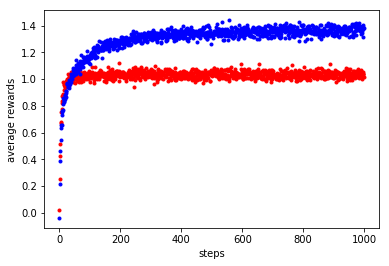

In [37]:
# plot stuff and yield results 
total_reward = total_reward/b
total_reward2 = total_reward2/b
print("Epsilon = 0 has total average reward of: ", total_reward)
print("Epsilon = 0.1 has total average reward of: ", total_reward2)

x_axis = np.arange(0,1000)
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.plot(x_axis, average_rewards1,'r.', x_axis, average_rewards2,'b.')
plt.show()

## Stepsize comparison (stationary)

Now we start with the real exercise and compare the stepsizes of two epsilon greedy algorithms with epsilon = 0.1
In the first case we use a constant step-size and in the second example we use the adaptive stepsize 1/n

### Constant stepsize

In [38]:
# initialize data structures
action_values = np.zeros(10)
action_values_count = np.ones(10)
initial_action_values = np.zeros(10)
average_rewards1 = np.zeros(1000)
total_reward1 = 0
max_action = 0

print(initial_action_values)
# number of loop iterations 
a = 1
b = 2000

# initialize action_values with normal distribution around 0 and variance 1
for i in range(0,10): 
    initial_action_values[i] = np.random.normal(0,1,1)
    
stepsize = 0.1
    
#######################################################

# implement greedy learning algorithm with changing rewards(non-stationarity) and we do a thousand steps 
for z in range(a,b):
    for i in range(0,1000):
        epsilon = np.random.choice(2, 1, p=[0.1, 0.9])

        # we exploit
        if(epsilon[0] == 1): 
            #find maximal action value 
            max_index = np.argmax(action_values)
            max_reward = np.random.normal(initial_action_values[max_index],1,1)
            #print("z: ",z," i: ",i ,"taking arm", max_index, "Max_reward: ", max_reward)
            action_values[max_index] = action_values[max_index] + stepsize*(max_reward - action_values[max_index])
            total_reward1 += max_reward
            action_values_count[max_index] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards1[i] = average_rewards1[i] + (1.0/z)*(max_reward-average_rewards1[i])
            
        # we explore        
        else: 
            k = np.random.choice(10, 1)
            action = initial_action_values[k]
            reward = np.random.normal(action,1,1)
            #print("z: ",z," i: ",i ,"reward: ", reward)
            action_values[k] = action_values[k] + stepsize*(reward - action_values[k])
            total_reward1 += reward
            action_values_count[k] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards1[i] = average_rewards1[i] + (1.0/z)*(reward-average_rewards1[i])
            
        max_action = 0
                
    # re-initialize action_values with normal distribution around 0 and variance 1 after each one of the 2000 rounds
    for l in range(0,10): 
        initial_action_values[l] = np.random.normal(0,1,1)
    action_values = np.zeros(10)
    # re-initialize action_values_counts
    action_values_count = np.ones(10)
 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Changing stepsize

In [39]:
# initialize data structures
action_values = np.zeros(10)
action_values_count = np.ones(10)
initial_action_values = np.zeros(10)
average_rewards2 = np.zeros(1000)
total_reward2 = 0
max_action = 0

print(initial_action_values)
# number of loop iterations 
a = 1
b = 2000

# initialize action_values with normal distribution around 0 and variance 1
for i in range(0,10): 
    initial_action_values[i] = np.random.normal(0,1,1)
    
#######################################################

# implement greedy learning algorithm with non-changing rewards(stationarity) and we do a thousand steps 
for z in range(a,b):
    for i in range(0,1000):
        epsilon = np.random.choice(2, 1, p=[0.1, 0.9])

        # we exploit
        if(epsilon[0] == 1): 
            #find maximal action value 
            max_index = np.argmax(action_values)
            max_reward = np.random.normal(initial_action_values[max_index],1,1)
            #print("z: ",z," i: ",i ,"taking arm", max_index, "Max_reward: ", max_reward)
            action_values[max_index] = action_values[max_index] + (1.0/action_values_count[max_index])*(max_reward - action_values[max_index])
            total_reward2 += max_reward
            action_values_count[max_index] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards2[i] = average_rewards2[i] + (1.0/z)*(max_reward-average_rewards2[i])
            
        # we explore        
        else: 
            k = np.random.choice(10, 1)
            action = initial_action_values[k]
            reward = np.random.normal(action,1,1)
            #print("z: ",z," i: ",i ,"reward: ", reward)
            action_values[k] = action_values[k] + (1.0/action_values_count[k])*(reward - action_values[k])
            total_reward2 += reward
            action_values_count[k] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards2[i] = average_rewards2[i] + (1.0/z)*(reward-average_rewards2[i])
            
        max_action = 0
                
    # re-initialize action_values with normal distribution around 0 and variance 1 after each one of the 2000 rounds
    for l in range(0,10): 
        initial_action_values[l] = np.random.normal(0,1,1)
    action_values = np.zeros(10)
    # re-initialize action_values_counts
    action_values_count = np.ones(10)
 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Constant stepsize has has total average reward of:  [ 1243.36718491]
Changing stepsize has total average reward of:  [ 1318.59103669]


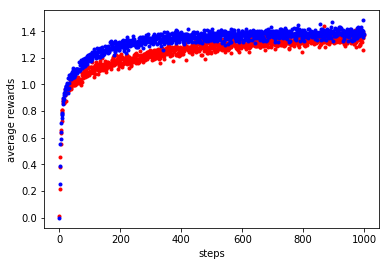

In [40]:
# plot stuff and yield results 
total_reward1 = total_reward1/b
total_reward2 = total_reward2/b
print("Constant stepsize has has total average reward of: ", total_reward1)
print("Changing stepsize has total average reward of: ", total_reward2)

x_axis = np.arange(0,1000)
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.plot(x_axis, average_rewards1,'r.', x_axis, average_rewards2,'b.')
plt.show()

## Step-size comparison(non-stationary)

### Constant stepsize

In [41]:
# initialize data structures
action_values = np.zeros(10)
action_values_count = np.ones(10)
initial_action_values = np.zeros(10)
average_rewards1 = np.zeros(1000)
total_reward1 = 0
max_action = 0

print(initial_action_values)
# number of loop iterations 
a = 1
b = 1000

# initialize action_values with normal distribution around 0 and variance 1
for i in range(0,10): 
    initial_action_values[i] = np.random.normal(0,1,1)
    
stepsize = 0.1
    
#######################################################

# implement greedy learning algorithm with changing rewards(non-stationarity) and we do a thousand steps 
for z in range(a,b):
    for i in range(0,1000):
        epsilon = np.random.choice(2, 1, p=[0.1, 0.9])

        # we exploit
        if(epsilon[0] == 1): 
            #find maximal action value 
            max_index = np.argmax(action_values)
            max_reward = np.random.normal(initial_action_values[max_index],1,1)
            #print("z: ",z," i: ",i ,"taking arm", max_index, "Max_reward: ", max_reward)
            action_values[max_index] = action_values[max_index] + stepsize*(max_reward - action_values[max_index])
            total_reward1 += max_reward
            action_values_count[max_index] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards1[i] = average_rewards1[i] + (1.0/z)*(max_reward-average_rewards1[i])
            
        # we explore        
        else: 
            k = np.random.choice(10, 1)
            action = initial_action_values[k]
            reward = np.random.normal(action,1,1)
            #print("z: ",z," i: ",i ,"reward: ", reward)
            action_values[k] = action_values[k] + stepsize*(reward - action_values[k])
            total_reward1 += reward
            action_values_count[k] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards1[i] = average_rewards1[i] + (1.0/z)*(reward-average_rewards1[i])
            
        max_action = 0
        
        # change the mean rewards of the arms(non-stationarity constraint) -> random walk
        for q in range(0,10):
            rand = np.random.choice(2,1)
            if(rand == 0):
                initial_action_values[q] += 0.1
            else: 
                initial_action_values[q] -= 0.1
                
    # re-initialize action_values with normal distribution around 0 and variance 1 after each one of the 2000 rounds
    for l in range(0,10): 
        initial_action_values[l] = np.random.normal(0,1,1)
    action_values = np.zeros(10)
    # re-initialize action_values_counts
    action_values_count = np.ones(10)
 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Adaptive stepsize

In [42]:
# initialize data structures
action_values = np.zeros(10)
action_values_count = np.ones(10)
initial_action_values = np.zeros(10)
average_rewards2 = np.zeros(1000)
total_reward2 = 0
max_action = 0

print(initial_action_values)
# number of loop iterations 
a = 1
b = 1000

# initialize action_values with normal distribution around 0 and variance 1
for i in range(0,10): 
    initial_action_values[i] = np.random.normal(0,1,1)
    
#######################################################

# implement greedy learning algorithm with non-changing rewards(stationarity) and we do a thousand steps 
for z in range(a,b):
    for i in range(0,1000):
        epsilon = np.random.choice(2, 1, p=[0.1, 0.9])

        # we exploit
        if(epsilon[0] == 1): 
            #find maximal action value 
            max_index = np.argmax(action_values)
            max_reward = np.random.normal(initial_action_values[max_index],1,1)
            #print("z: ",z," i: ",i ,"taking arm", max_index, "Max_reward: ", max_reward)
            action_values[max_index] = action_values[max_index] + (1.0/action_values_count[max_index])*(max_reward - action_values[max_index])
            total_reward2 += max_reward
            action_values_count[max_index] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards2[i] = average_rewards2[i] + (1.0/z)*(max_reward-average_rewards2[i])
            
        # we explore        
        else: 
            k = np.random.choice(10, 1)
            action = initial_action_values[k]
            reward = np.random.normal(action,1,1)
            #print("z: ",z," i: ",i ,"reward: ", reward)
            action_values[k] = action_values[k] + (1.0/action_values_count[k])*(reward - action_values[k])
            total_reward2 += reward
            action_values_count[k] +=1
            
            #lets iteratively calculate the mean of the rewards in each timestep of 1000 timesteps
            # repeated over 2000 rounds
            average_rewards2[i] = average_rewards2[i] + (1.0/z)*(reward-average_rewards2[i])
            
        max_action = 0
        
        # change the mean rewards of the arms(non-stationarity constraint) -> random walk
        for q in range(0,10):
            rand = np.random.choice(2,1)
            if(rand == 0):
                initial_action_values[q] += 0.1
            else: 
                initial_action_values[q] -= 0.1
                
    # re-initialize action_values with normal distribution around 0 and variance 1 after each one of the 2000 rounds
    for l in range(0,10): 
        initial_action_values[l] = np.random.normal(0,1,1)
    action_values = np.zeros(10)
    # re-initialize action_values_counts
    action_values_count = np.ones(10)
 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Constant stepsize has has total average reward of:  [ 2676.40577521]
Changing stepsize has total average reward of:  [ 2560.74021503]


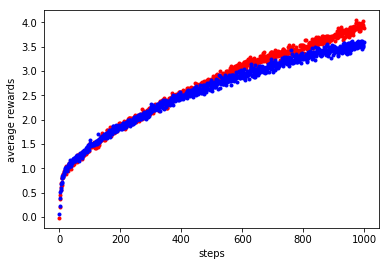

In [43]:
# plot stuff and yield results 
total_reward1 = total_reward1/b
total_reward2 = total_reward2/b
print("Constant stepsize has has total average reward of: ", total_reward1)
print("Changing stepsize has total average reward of: ", total_reward2)

x_axis = np.arange(0,1000)
plt.xlabel('steps')
plt.ylabel('average rewards')
plt.plot(x_axis, average_rewards1,'r.', x_axis, average_rewards2,'b.')
plt.show()